# THỐNG KÊ MÁY TÍNH VÀ ỨNG DỤNG (ĐTTX)

**Khoa Công nghệ Thông tin - ĐH Khoa học Tự nhiên TP. HCM ([fit@hcmus](https://www.fit.hcmus.edu.vn/))**

*Giảng viên: Vũ Quốc Hoàng (vqhoang@fit.hcmus.edu.vn)*

# BÀI 5 - TRỰC QUAN HÓA DỮ LIỆU VỚI MATPLOTLIB (Phần 2)

**Nội dung**

* [Biểu đồ thanh](#bieu_do_thanh)
  * [Biểu đồ thanh đứng](#thanh_dung)
  * [Biểu đồ thanh ngang](#thanh_ngang)
  * [Biểu đồ thanh gom nhóm](#thanh_gom_nhom)
  * [Biểu đồ thanh xếp chồng](#thanh_xep_chong)
* [Biểu đồ phân tán](#bieu_do_phan_tan)

**Tài liệu tham khảo**

* Chương 27 [Python Data Science Handbook (Jake VanderPlas)](https://www.amazon.com/Python-Data-Science-Handbook-Essential-dp-1098121228/dp/1098121228/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## <a name="bieu_do_thanh"/>Biểu đồ thanh

### <a name="thanh_dung"/>Biểu đồ thanh đứng

Dữ liệu doanh số mỗi vùng

In [2]:
regions = ["A", "B", "C", "D", "E"]
sales = [1_000, 5_000, 7_500, 8_000, 9_500]

Vẽ **biểu đồ thanh** (bar chart) bằng hàm [`bar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

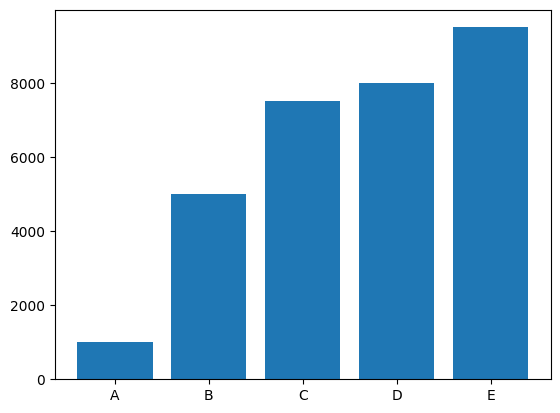

In [3]:
plt.bar(regions, sales)
plt.show()

Các thiết lập chi tiết

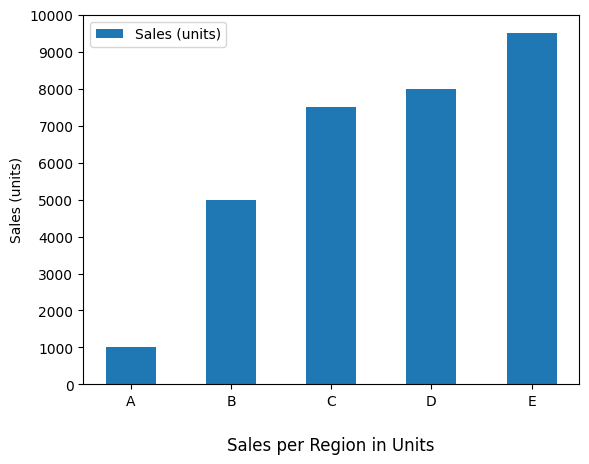

In [4]:
plt.bar(regions, sales, width=0.5, label="Sales (units)")

plt.title("Sales per Region in Units", y=-0.2)
plt.ylabel("Sales (units)")
plt.yticks([1000*i for i in range(11)])
plt.legend()

plt.show()

### <a name="thanh_ngang"/>Biểu đồ thanh ngang

Dữ liệu **tỉ lệ** (proportion, percentage) thỏa mãn mỗi thể loại game

In [5]:
genres = ["Sports", "Strategy", "Action", "Shooter", "Other"]
units_solds = [27_500, 11_500, 6_000, 3_500, 1_500] # unit
satisfied_props = [99, 90, 85, 95, 80] # %

Vẽ **biểu đồ thanh ngang** (horizontal bar chart) bằng hàm [`barh`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html)

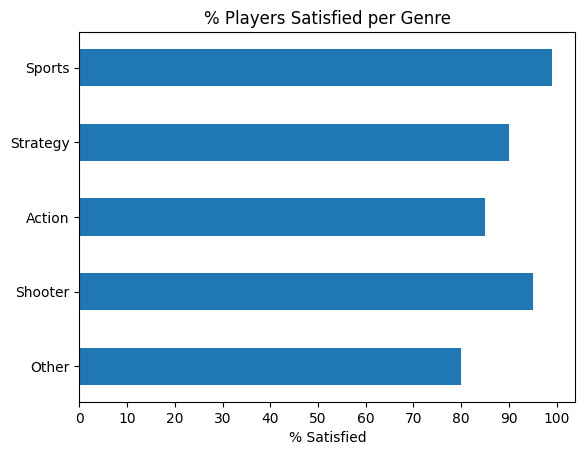

In [6]:
y_pos = range(len(genres))

plt.barh(y_pos, satisfied_props, height=0.5)

plt.title("% Players Satisfied per Genre")
plt.xlabel("% Satisfied")
plt.xticks([10*i for i in range(11)])
plt.yticks(range(len(genres)), genres)
plt.gca().invert_yaxis()

plt.show()

### <a name="thanh_gom_nhom"/>Biểu đồ thanh gom nhóm

Tần số game thủ thỏa mãn và không thỏa mãn mỗi thể loại game

In [7]:
satisfied_nums = [int(prop/100 * sale) for prop, sale in zip(satisfied_props, units_solds)]
satisfied_nums

[27225, 10350, 5100, 3325, 1200]

In [8]:
dissatisfied_nums = [sale - sat_num for sale, sat_num in zip(units_solds, satisfied_nums)]
dissatisfied_nums

[275, 1150, 900, 175, 300]

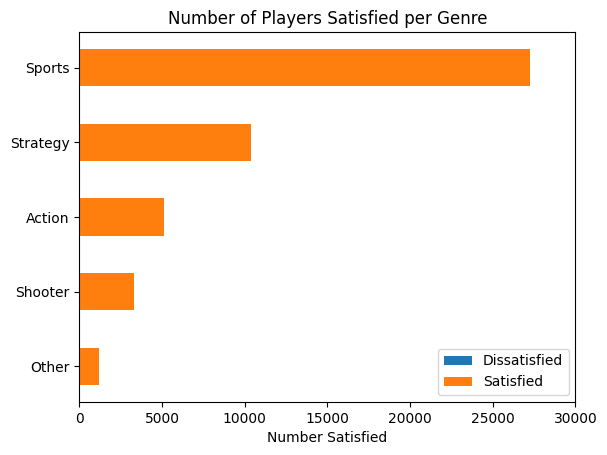

In [9]:
y_pos = range(len(genres))

plt.barh(y_pos, dissatisfied_nums, height=0.5, label="Dissatisfied")
plt.barh(y_pos, satisfied_nums, height=0.5, label="Satisfied")

plt.title("Number of Players Satisfied per Genre")
plt.xlabel("Number Satisfied")
plt.xticks([5000*i for i in range(7)])
plt.yticks(range(len(genres)), genres)
plt.gca().invert_yaxis()
plt.legend()

plt.show()

Vẽ **biểu đồ thanh gom nhóm** (grouped bar chart, split-category bar chart) cho tần số game thủ thỏa mãn và không thỏa mãn mỗi thể loại game

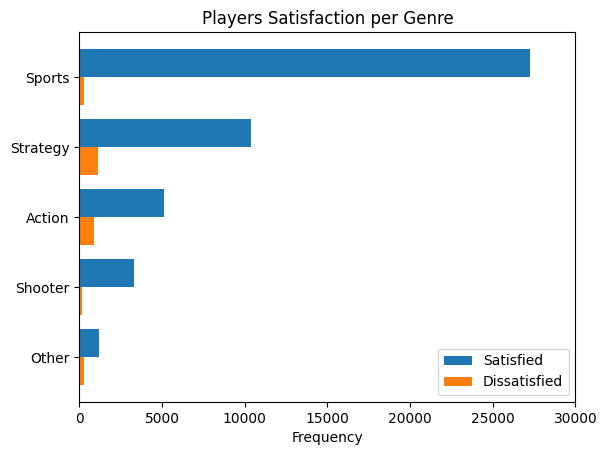

In [10]:
height = 0.4
y_pos = range(len(genres))
y_pos1 = [y - height/2 for y in y_pos]
y_pos2 = [y + height/2 for y in y_pos]

plt.barh(y_pos1, satisfied_nums, height=height, label="Satisfied")
plt.barh(y_pos2, dissatisfied_nums, height=height, label="Dissatisfied")

plt.title("Players Satisfaction per Genre")
plt.xlabel("Frequency")
plt.xticks([5000*i for i in range(7)])
plt.yticks(range(len(genres)), genres)
plt.gca().invert_yaxis()
plt.legend()

plt.show()

### <a name="thanh_xep_chong"/>Biểu đồ thanh xếp chồng

Vẽ **biểu đồ thanh xếp chồng** (stacked bar chart, segmented bar char) cho tần số và tỉ lệ game thủ thỏa mãn và không thỏa mãn mỗi thể loại game

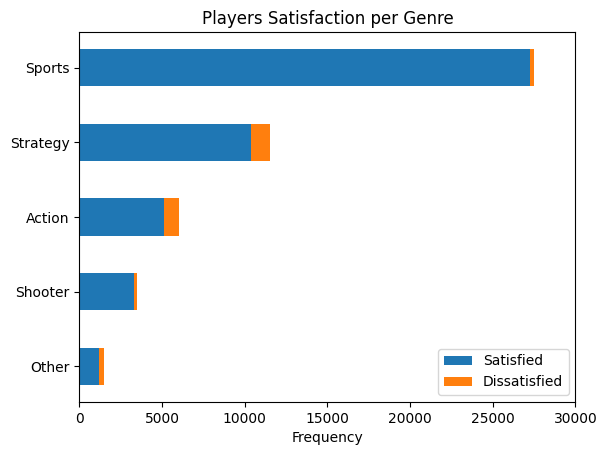

In [11]:
y_pos = range(len(genres))

plt.barh(y_pos, satisfied_nums, height=0.5, label="Satisfied")
plt.barh(y_pos, dissatisfied_nums, height=0.5, left=satisfied_nums, label="Dissatisfied")

plt.title("Players Satisfaction per Genre")
plt.xlabel("Frequency")
plt.xticks([5000*i for i in range(7)])
plt.yticks(range(len(genres)), genres)
plt.gca().invert_yaxis()
plt.legend()

plt.show()

Dữ liệu [`Iris Data Set`](https://archive.ics.uci.edu/ml/datasets/Iris).

In [12]:
iris_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris = pd.read_csv('iris.data', names=iris_names)
iris 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Biểu đồ thanh cho các nhóm sepal_length của bộ dữ liệu `Iris`.

In [13]:
iris.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [14]:
iris.sepal_length.value_counts(bins=5)

sepal_length
(5.74, 6.46]     42
(5.02, 5.74]     41
(4.295, 5.02]    32
(6.46, 7.18]     24
(7.18, 7.9]      11
Name: count, dtype: int64

In [15]:
iris.sepal_length.value_counts(bins=5).sort_index()

sepal_length
(4.295, 5.02]    32
(5.02, 5.74]     41
(5.74, 6.46]     42
(6.46, 7.18]     24
(7.18, 7.9]      11
Name: count, dtype: int64

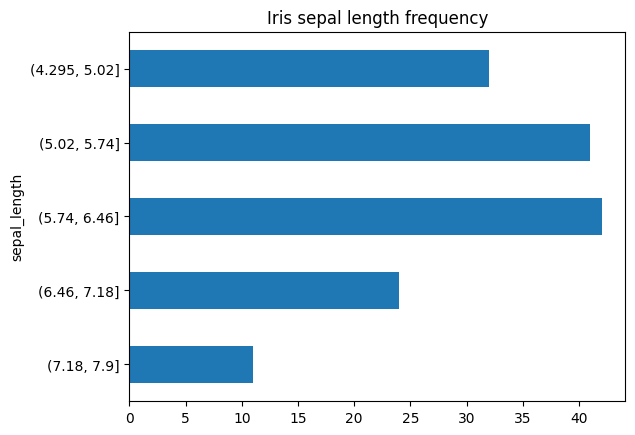

In [16]:
iris.sepal_length.value_counts(bins=5).sort_index(ascending=False).plot.barh()
plt.title("Iris sepal length frequency")
plt.show()

**Bài tập**. Vẽ biểu đồ thanh cho biết tần số các nhóm của sepal_width trong bộ dữ liệu `Iris`.

In [17]:
# TODO:


**Bài tập**. Vẽ biểu đồ thanh cho biết tần số các nhóm của sepal_width trong bộ dữ liệu `Iris` chia theo các nhóm: [2.0, 2.5], (2.5, 3.0], (3.0, 3.5], (3.5, 4.0], (4.0, 4.5].

In [18]:
# TODO:


**Bài tập**. Vẽ biểu đồ thanh gom nhóm cho tần số các nhóm của sepal_width chia theo giống hoa.

In [19]:
# TODO:


**Bài tập**. Vẽ biểu đồ thanh xếp chồng cho tần số các nhóm của sepal_width chia theo giống hoa. 

In [20]:
# TODO:


## <a name="bieu_do_phan_tan"/>Biểu đồ phân tán

**Biểu đồ phân tán** (scatter plot) thường được dùng để mô tả quan hệ giữa 2 đại lượng số.

Ví dụ sau mô tả quan hệ giữa thời gian và quãng đường di chuyển của vật rơi tự do.

In [21]:
t = np.arange(11)
g = 9.8
v = g * t
d = 1/2 * g * t**2

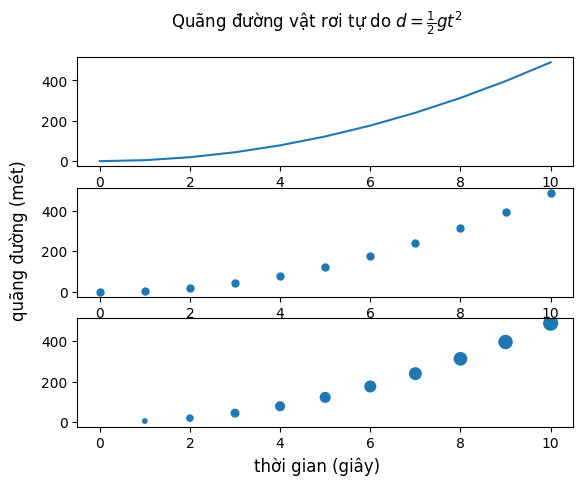

In [22]:
fig, ax = plt.subplots(3)

ax[0].plot(t, d)
ax[1].plot(t, d, "o", markersize=5)
ax[2].scatter(t, d, s=v)

fig.suptitle(r"Quãng đường vật rơi tự do $d = \frac{1}{2}gt^2$")
fig.supxlabel("thời gian (giây)")
fig.supylabel("quãng đường (mét)")

plt.show()

Hàm [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) cho phép vẽ các chấm với các thuộc tính (kích thước, màu, ...) phụ thuộc vào dữ liệu.

Biểu đồ phân tán sau mô tả quan hệ giữa sepal_length và sepal_width trong bộ dữ liệu Iris. Hơn nữa, các chấm cũng được tô màu theo loại hoa.

In [23]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

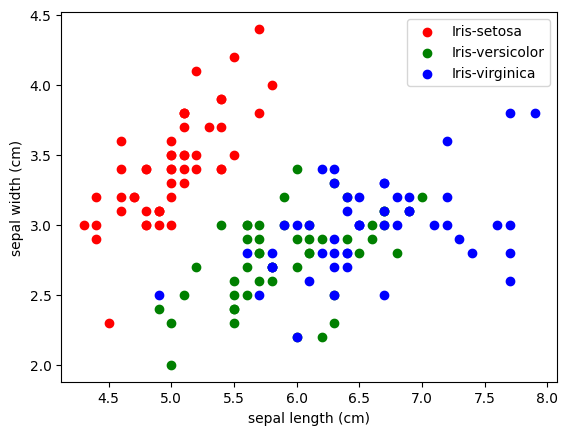

In [24]:
colors = ["red", "green", "blue"]
for specie, color in zip(iris.species.unique(), colors):
    x = iris.sepal_length[iris.species == specie]
    y = iris.sepal_width[iris.species == specie]
    plt.scatter(x, y, c=color, label=specie)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.legend()
plt.show()

Hoặc đơn giản hơn với pandas.

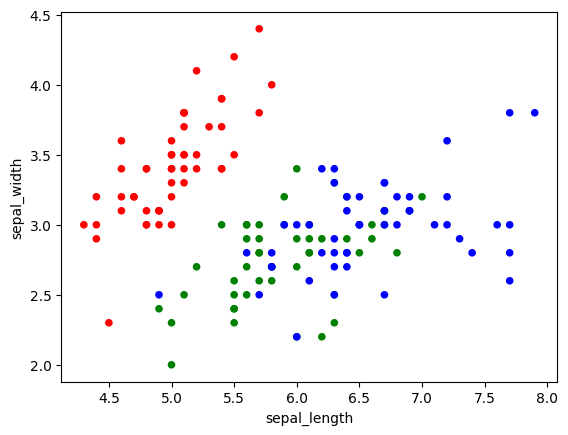

In [25]:
iris.plot.scatter("sepal_length", "sepal_width", 
                   c=iris.species.map({"Iris-setosa": "red", "Iris-versicolor": "green", "Iris-virginica": "blue"}))
plt.show()

Hoặc đơn giản hơn nữa với seaborn.

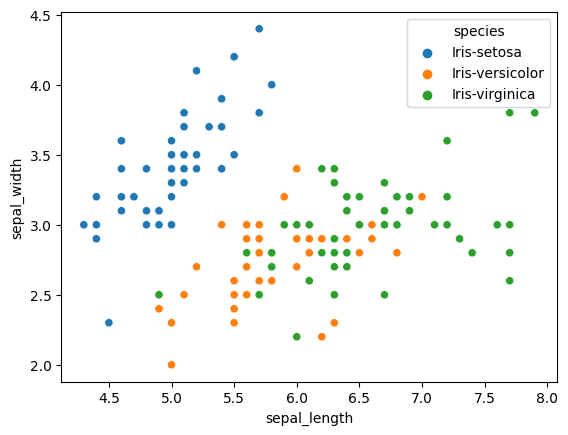

In [26]:
sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", hue="species")
plt.show()

Từ biểu đồ phân tán trên, ta nhận thấy:
- Với giống setosa hay versicolor, có tương quan thuận giữa sepal_width và sepal_length (nghĩa là khi sepal_length lớn thì sepal_width cũng lớn), trong khi, giống virginica không cho thấy tương quan rõ ràng
- Dựa vào sepal_length và sepal_width, giống setosa phân lớp rõ ràng với 2 giống còn lại, trong khi giống versicolor và virginica thì lẫn vào nhau (khó phân lớp)

**Bài tập**. Với bộ dữ liệu Iris, vẽ biểu đồ phân tán và nhận xét cho các cặp biến
1. sepal_length và petal_length
1. petal_length và petal_width
1. sepal_width và petal_width

In [27]:
# TODO:
